## Extensive Games
Ismael Oulkhir


Mail: oulkhir.ismael@gmail.com

LinkedIn: https://www.linkedin.com/in/ismail-oulkhir/


The Main features of Extensive games is that : 
- Moves are in sequence
- Every possible situation is known to the players, at any time they know the whole past history and the future developments 

**Perfect Information** : 
    Each player is informed of all the events that have previously occured : Chess - Tic-Tac-Toe - Go

Mathematically an **Extensive game can be defined as**:
- A finite set ${1...n}$ of players
- A game tree $(V,E,x_0)$
- A partition of the ${P_1,...,P_{n+1}}$ of the vertices which are not leaves
- A probability distribution for each vertex $P_{n+1}$ defined on the edges from the vertex to it's children
- An n-dimensional vector of payoffs/utilities attached to each leaf

$P_i$ is the set of nodes v where Player i must choose a child of v representing a possible move for him.

$P_{n+1}$ is the set of nodes where a chance move is present

When there is no chance move, there is no need for utility function, we can use preferences only on the leaves.

If we define the **length** of the game as the length of the longest path from the root to the leaves.

Decision theory allows to solve games of length 1. 

Rationality assumption 4 (Leveling) allows solving games of length i+1 if games of length i is solved. 

Thus We can solve any extensive game of finite length using **Backward Induction**.

**The Rational outcome of any finite length Extensive form game is given by Backward Induction.**

## 2 Hedge Funds Example

Assume you have two hedge funds undertaking this situation :

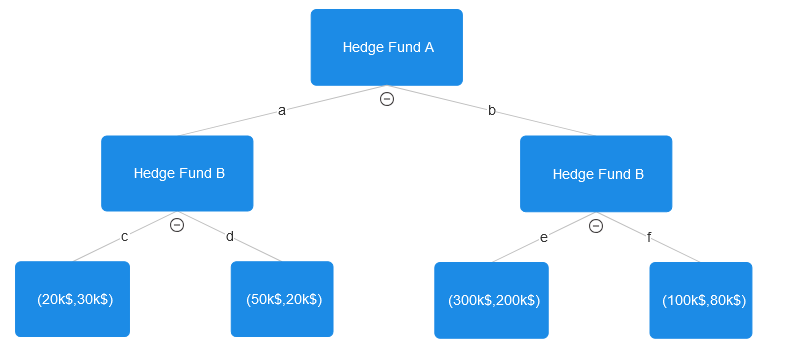

Let's code a python program to solve this recursively

In [10]:
# Define the game tree
game_tree = {
    "player": 1,
    "strategies": {
        "a": {
            "player": 2,
            "strategies": {
                "c": {"payoff": (20, 30)},  # Payoff for (Player 1, Player 2)
                "d": {"payoff": (50, 20)}
            }
        },
        "b": {
            "player": 2,
            "strategies": {
                "e": {"payoff": (300, 200)},
                "f": {"payoff": (100, 80)}
            }
        }
    }
}

# Recursive function to solve the game
def solve_game(node):
    if "payoff" in node:
        # Base case: leaf node, return the payoff
        return node["payoff"]
    
    # Recursive case: determine the best response for the current player
    player = node["player"]
    best_payoff = None
    best_strategy = None
    
    for strategy, child in node["strategies"].items():
        # Get the payoff for this strategy
        payoff = solve_game(child)
        
        # Determine if this is the best strategy for the current player
        if best_payoff is None:
            best_payoff = payoff
            best_strategy = strategy
        else:
            # Compare payoffs for the current player
            if player == 1 and payoff[0] > best_payoff[0]:
                best_payoff = payoff
                best_strategy = strategy
            elif player == 2 and payoff[1] > best_payoff[1]:
                best_payoff = payoff
                best_strategy = strategy
    
    # Store the best payoff and strategy in the current node
    node["best_payoff"] = best_payoff
    node["best_strategy"] = best_strategy
    
    return best_payoff

# Solve the game
solve_game(game_tree)

# Print the results
def print_results(node, indent=""):
    if "payoff" in node:
        print(f"{indent}Payoff: {node['payoff']}")
    else:
        print(f"{indent}Player {node['player']} chooses {node['best_strategy']} (Payoff: {node['best_payoff']})")
        for strategy, child in node["strategies"].items():
            print(f"{indent}  If {strategy}:")
            print_results(child, indent + "    ")

print_results(game_tree)

Player 1 chooses b (Payoff: (300, 200))
  If a:
    Player 2 chooses c (Payoff: (20, 30))
      If c:
        Payoff: (20, 30)
      If d:
        Payoff: (50, 20)
  If b:
    Player 2 chooses e (Payoff: (300, 200))
      If e:
        Payoff: (300, 200)
      If f:
        Payoff: (100, 80)


## Impartial Combinatorial game 

- Game involving Two players alternating moves
- Finite number of positions
- Players follow the same rules
- Game ends when no further moves are possible
- Game doesn't involve chance
- Classical version : player with no moves left. Misère when you leave the other player to take the last move

We Solve these games by classifying positions to P positions or N positions.

In the classical version :
- Terminal Positions are P positions (losing)
- From P position you can only go to N position 
- From N position you can go to P or N (Winning)

### Nim Game
In the nim game you are confronted k piles of cards $(n_1,....,n_k)$. The objective is to clear the table i.e the last player taking cards (Classical Version)

In [5]:
def nim_game_solver(L):
    S=0
    for k in L :
        S^=k
    if S==0:
        return "this nim game is a P-position"
    else :
        return "this is an N-Position"
    
Example=[2,2,0]
print(nim_game_solver(Example))

this nim game is a P-position
